In [12]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
data = (load_breast_cancer())
df = pd.DataFrame(data, columns=data.feature_names)

print(data.feature_names)

x = data['data']
y = data['target']

data.data

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error
import math

model = LogisticRegression()

model.fit(x_train, y_train)

pred = model.predict(x_test)

print("confusion matrix: \n", confusion_matrix(y_test,pred))
print("precision score: ", precision_score(y_test,pred))
print("recall score : ", recall_score(y_test,pred))
print("f1 score: ", f1_score(y_test,pred))
print(f"accuracy_score : {accuracy_score(y_test, pred)}")
print(f"mae: {mean_absolute_error(y_test,pred)}")
print(f"mse: {mean_squared_error(y_test,pred)}")
print(f"rmse: {math.sqrt(mean_squared_error(y_test,pred))}")


accuracy = accuracy_score(y_test, pred)




confusion matrix: 
 [[ 62   1]
 [  2 106]]
precision score:  0.9906542056074766
recall score :  0.9814814814814815
f1 score:  0.986046511627907
accuracy_score : 0.9824561403508771
mae: 0.017543859649122806
mse: 0.017543859649122806
rmse: 0.13245323570650439


In [15]:
from sklearn.svm import SVC
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

MLPmodel = MLPClassifier(max_iter=1000)
model = KernelRidge(alpha=1.0, kernel='rbf')
knnmodel = KNeighborsClassifier(n_neighbors = 5)
model= RandomForestClassifier(n_estimators=7)

# and just use the model as 


<Axes: ylabel='Count'>

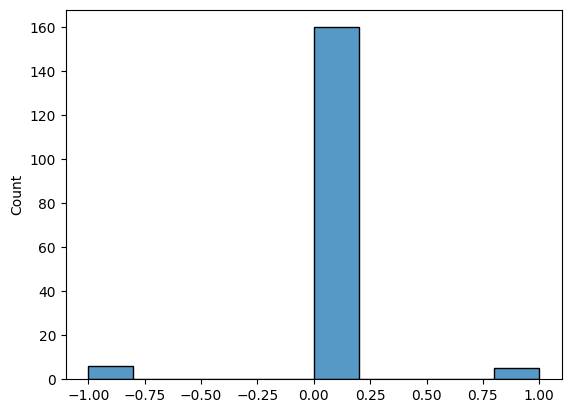

In [16]:
model = GaussianNB()

model.fit(x_train, y_train)
pred = model.predict(x_test)
model.score(x_test, y_test)

import seaborn as sns

sns.histplot((y_test-pred), bins= 10)

#### Regularization

In [17]:
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=1000)
# or
log_reg_l2 = LogisticRegression(penalty='l2', C=1.0, max_iter=1000) 

In [18]:
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer

data = fetch_california_housing()

data.DESCR
num_columns = data.data.shape[1]
num_columns

column_names = data.feature_names

column_names
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

y = data.target
x = data.data

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

sc = StandardScaler()


model = LinearRegression()

model.fit(x_train, y_train)

pred = model.predict(x_test)
print("here")
# model.score(x_test, y_test)
print("here2")
print(mean_absolute_error(y_test, pred))


here
here2
0.5380037628792868


-----------------------------------------
mse: 0.533475379859364
mse2: 0.5308877457495818


<Axes: ylabel='Count'>

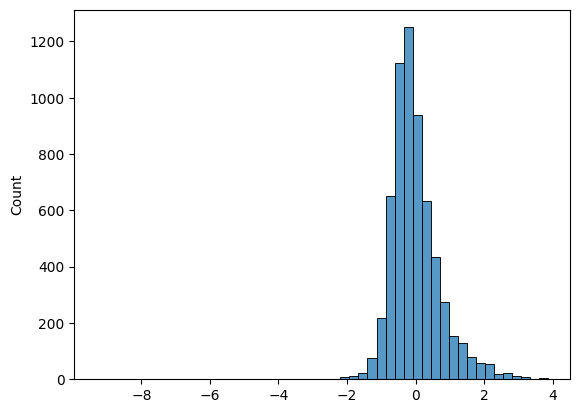

In [20]:
from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing()

dataset
print("-----------------------------------------")

x = dataset.data
y = dataset.target

from sklearn.linear_model import LinearRegression

model = LinearRegression()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)
from sklearn.metrics import mean_squared_error
mse = mean_absolute_error(y_pred, y_test)
mse2 = mean_squared_error(y_test, y_pred)
print(f"mse: {mse}")
print(f"mse2: {mse2}")

import seaborn as sns
sns.histplot((y_test-y_pred), bins= 50)

In [21]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error
data = load_breast_cancer()
x = data.data
y = data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

model = AdaBoostClassifier()


model.fit(x_train, y_train)

pred = model.predict(x_test)


print("confusion matrix: \n", confusion_matrix(y_test,pred))




confusion matrix: 
 [[ 50   3]
 [  1 117]]


c:\Users\mayuk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Confusion matrix:
 [[ 49   4]
 [  8 110]]


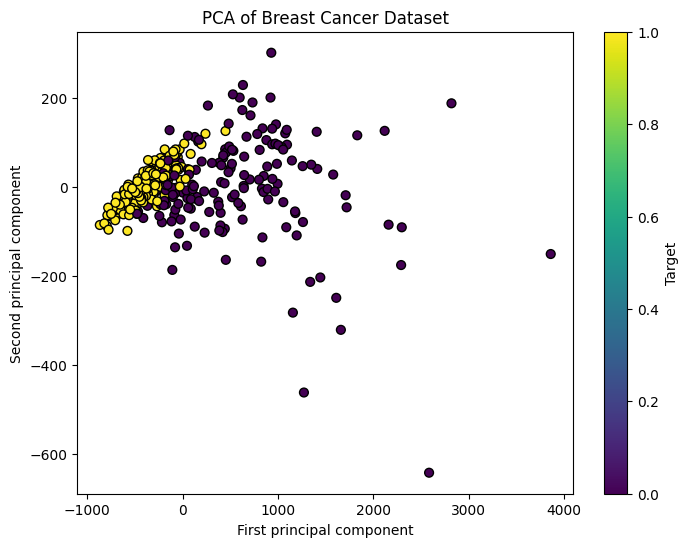

In [22]:
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

# PCA transformation
## PCA is only used for  dimensionality reduction 
pca = PCA(n_components=3)
x_train_transformed = pca.fit_transform(x_train)  # Only use X, not y
x_test_transformed = pca.transform(x_test)

# After PCA, you'll need a classifier to make predictions
# For example, using a random forest classifier:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(x_train_transformed, y_train)
pred = classifier.predict(x_test_transformed)

# Now you can compute the confusion matrix
print("Confusion matrix:\n", confusion_matrix(y_test, pred))

import matplotlib.pyplot as plt

# Plot the PCA components
plt.figure(figsize=(8, 6))
plt.scatter(x_train_transformed[:, 0], x_train_transformed[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=40)
plt.title('PCA of Breast Cancer Dataset')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.colorbar(label='Target')
plt.show()

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load the breast cancer dataset
data = load_breast_cancer()
x = data.data
y = data.target

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Instantiate the models
model = LogisticRegression(max_iter=10000)  # Default model
modelL1 = LogisticRegression(penalty='l1', solver='libli    near', C=1.0, max_iter=10000)
modelL2 = LogisticRegression(penalty='l2', C=1.0, max_iter=10000)

# Fit the models on the training data
model.fit(x_train, y_train)
modelL1.fit(x_train, y_train)
modelL2.fit(x_train, y_train)

# Predict using the testing data
pred = model.predict(x_test)
predL1 = modelL1.predict(x_test)
predL2 = modelL2.predict(x_test)

# Calculate accuracy for each model
acc = accuracy_score(y_test, pred)
accL1 = accuracy_score(y_test, predL1)
accL2 = accuracy_score(y_test, predL2)

# Print the accuracy results
print(f"Default Logistic Regression accuracy: {acc}")
print(f"Logistic Regression with L1 regularization accuracy: {accL1}")
print(f"Logistic Regression with L2 regularization accuracy: {accL2}")


InvalidParameterError: The 'solver' parameter of LogisticRegression must be a str among {'saga', 'newton-cg', 'lbfgs', 'newton-cholesky', 'sag', 'liblinear'}. Got 'libli    near' instead.

In [33]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(max_iter=1000)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(model.score(x_test, y_test))

a = accuracy_score(y_pred, y_test)
print("here")
print(a)

0.9707602339181286
here
0.9707602339181286


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
(442,)
(133, 1)


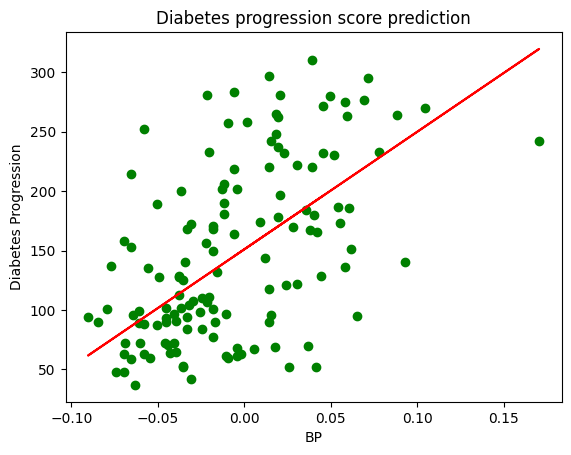

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
data=load_diabetes()
'''print(data.target_names)
print(data.feature_names)'''

x=data.data
y=data.target
x=x[:,2]
print(data.feature_names)
X_train,X_test, y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
print(X_test.shape)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

plt.title("Diabetes progression score prediction")
plt.scatter(X_test,y_test,color='g')
plt.plot(X_test,y_pred,color='r')
plt.xlabel("BP")
plt.ylabel("Diabetes Progression")
plt.show()